### Python recipe to read and plots the MJO RMM index(es) phase plot 

### imports 

In [14]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [15]:
from datetime import datetime
from dateutil.parser import parse as dparse
import calendar

In [16]:
from IPython.display import HTML, Image, IFrame

### this is where the Wheeler and Hendon (2004) realtime RMM index lives, and what it looks like

In [17]:
url = 'http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt'

In [18]:
IFrame(url, width=1100, height=500)

### reads in the RMM index using Pandas

In [19]:
data = pd.read_table(url, skiprows=2, sep=r'\s+', header=None)

In [20]:
data.head()

,0,1,2,3,4,5,6,7
0,1974,6,1,1.63447,1.20304,5,2.02948,Final_value:__OLR_&_NCEP_winds
1,1974,6,2,1.60289,1.01512,5,1.89729,Final_value:__OLR_&_NCEP_winds
2,1974,6,3,1.51625,1.08551,5,1.86476,Final_value:__OLR_&_NCEP_winds
3,1974,6,4,1.50981,1.03573,5,1.83092,Final_value:__OLR_&_NCEP_winds
4,1974,6,5,1.55906,1.30518,5,2.03326,Final_value:__OLR_&_NCEP_winds


### some data munging follows

#### renaming the columns

In [21]:
data.columns = ['year', 'month', 'day', 'RMM1', 'RMM2', 'phase', 'amplitude', 'origin']

In [22]:
data.head()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
0,1974,6,1,1.63447,1.20304,5,2.02948,Final_value:__OLR_&_NCEP_winds
1,1974,6,2,1.60289,1.01512,5,1.89729,Final_value:__OLR_&_NCEP_winds
2,1974,6,3,1.51625,1.08551,5,1.86476,Final_value:__OLR_&_NCEP_winds
3,1974,6,4,1.50981,1.03573,5,1.83092,Final_value:__OLR_&_NCEP_winds
4,1974,6,5,1.55906,1.30518,5,2.03326,Final_value:__OLR_&_NCEP_winds


#### set the index to be a datetime index

In [23]:
index = pd.to_datetime(data.loc[:,['year','month','day']])

In [24]:
data.index = index

In [25]:
data.head()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
1974-06-01,1974,6,1,1.63447,1.20304,5,2.02948,Final_value:__OLR_&_NCEP_winds
1974-06-02,1974,6,2,1.60289,1.01512,5,1.89729,Final_value:__OLR_&_NCEP_winds
1974-06-03,1974,6,3,1.51625,1.08551,5,1.86476,Final_value:__OLR_&_NCEP_winds
1974-06-04,1974,6,4,1.50981,1.03573,5,1.83092,Final_value:__OLR_&_NCEP_winds
1974-06-05,1974,6,5,1.55906,1.30518,5,2.03326,Final_value:__OLR_&_NCEP_winds


In [26]:
data.tail()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
2017-08-28,2017,8,28,-0.032225,-1.523627,2,1.523968,Prelim_value:_OLR_&_ACCESS_wind
2017-08-29,2017,8,29,0.208332,-1.185287,3,1.203456,Prelim_value:_OLR_&_ACCESS_wind
2017-08-30,2017,8,30,0.557943,-0.995999,3,1.141628,Prelim_value:_OLR_&_ACCESS_wind
2017-08-31,2017,8,31,0.740230,-0.538523,4,0.915395,Prelim_value:_OLR_&_ACCESS_wind
2017-09-01,2017,9,1,0.839690,-0.420525,4,0.939106,Prelim_value:_OLR_&_ACCESS_wind


### extracts the post 1979 period (no missing values)

In [27]:
data = data.loc['1979':,:]

In [28]:
data.head()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
1979-01-01,1979,1,1,0.142507,1.05047,6,1.06009,Final_value:__OLR_&_NCEP_winds
1979-01-02,1979,1,2,-0.204200,1.37361,7,1.38870,Final_value:__OLR_&_NCEP_winds
1979-01-03,1979,1,3,-0.158610,1.53943,7,1.54758,Final_value:__OLR_&_NCEP_winds
1979-01-04,1979,1,4,-0.182450,1.45972,7,1.47108,Final_value:__OLR_&_NCEP_winds
1979-01-05,1979,1,5,-0.320050,1.13680,7,1.18100,Final_value:__OLR_&_NCEP_winds


#### a simple plot

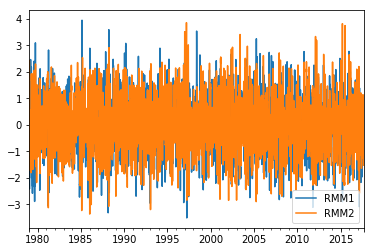

In [29]:
data.loc[:,['RMM1','RMM2']].plot()

### extracts the last 40 days

In [30]:
data_pol = data.iloc[-40:,:]

In [31]:
data_pol.head()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
2017-07-24,2017,7,24,0.846045,0.174577,5,0.863869,Prelim_value:_OLR_&_ACCESS_wind
2017-07-25,2017,7,25,0.744710,0.194866,5,0.769783,Prelim_value:_OLR_&_ACCESS_wind
2017-07-26,2017,7,26,0.729203,0.380412,5,0.822466,Prelim_value:_OLR_&_ACCESS_wind
2017-07-27,2017,7,27,0.347055,0.633800,6,0.722599,Prelim_value:_OLR_&_ACCESS_wind
2017-07-28,2017,7,28,-0.058112,1.052201,7,1.053804,Prelim_value:_OLR_&_ACCESS_wind


## draws a phase diagram as in the BoM MJO monitoring website

Below is what we're going to try and reproduce (more or less)

In [32]:
Image(url='http://www.bom.gov.au/climate/mjo/graphics/rmm.phase.Last40days.gif', width=500)

In [36]:
data_pol.head()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
2017-07-24,2017,7,24,0.846045,0.174577,5,0.863869,Prelim_value:_OLR_&_ACCESS_wind
2017-07-25,2017,7,25,0.744710,0.194866,5,0.769783,Prelim_value:_OLR_&_ACCESS_wind
2017-07-26,2017,7,26,0.729203,0.380412,5,0.822466,Prelim_value:_OLR_&_ACCESS_wind
2017-07-27,2017,7,27,0.347055,0.633800,6,0.722599,Prelim_value:_OLR_&_ACCESS_wind
2017-07-28,2017,7,28,-0.058112,1.052201,7,1.053804,Prelim_value:_OLR_&_ACCESS_wind


In [37]:
data_pol.tail()

,year,month,day,RMM1,RMM2,phase,amplitude,origin
2017-08-28,2017,8,28,-0.032225,-1.523627,2,1.523968,Prelim_value:_OLR_&_ACCESS_wind
2017-08-29,2017,8,29,0.208332,-1.185287,3,1.203456,Prelim_value:_OLR_&_ACCESS_wind
2017-08-30,2017,8,30,0.557943,-0.995999,3,1.141628,Prelim_value:_OLR_&_ACCESS_wind
2017-08-31,2017,8,31,0.740230,-0.538523,4,0.915395,Prelim_value:_OLR_&_ACCESS_wind
2017-09-01,2017,9,1,0.839690,-0.420525,4,0.939106,Prelim_value:_OLR_&_ACCESS_wind


### Assemble the plot in Matplotlib

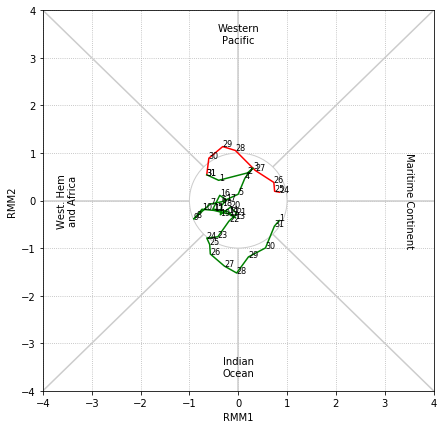

In [65]:
f, ax = plt.subplots(figsize=(7,7))

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.grid(linestyle=":")
ax.plot([-4,4],[-4,4], color='0.8')
ax.plot([4, -4],[-4,4], color='0.8')
ax.axhline(0, color='0.8')
ax.axvline(0, color='0.8')
circ = plt.Circle((0, 0), radius=1, edgecolor='0.8', facecolor='w', zorder=3)
ax.add_patch(circ)

m1 = data_pol.loc[None:'2017-07-31']
m2 = data_pol.loc['2017-07-31':None]

ax.plot(m1.RMM1.values, m1.RMM2.values, zorder=4, color='r')

ax.plot(m2.RMM1.values, m2.RMM2.values, zorder=4, color='g')

for i, row in m1.iterrows(): 
    ax.text(row.RMM1, row.RMM2, str(row.day), color='k', zorder=5, fontsize=8)

for i, row in m2.iterrows(): 
    ax.text(row.RMM1, row.RMM2, str(row.day), color='k', zorder=5, fontsize=8)

ax.set_ylabel('RMM2')
ax.set_xlabel('RMM1')

ax.text(3.5, 0, 'Maritime Continent', horizontalalignment='center', verticalalignment='center', rotation=-90)
ax.text(-3.5, 0, 'West. Hem\nand Africa', horizontalalignment='center', verticalalignment='center', rotation=90)
ax.text(0, 3.5, 'Western\nPacific', horizontalalignment='center', verticalalignment='center')
ax.text(0, -3.5, 'Indian\nOcean', horizontalalignment='center', verticalalignment='center')